In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

import os
os.chdir("../")

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
injection_sum_gnn = np.load('../variables/injection_sum_gnn.npy')
injection_final_gnn = np.load('../variables/injection_final_gnn.npy')
injection_init_gnn = np.load('../variables/injection_init_gnn.npy')

injection_sum_gcn = np.load('../variables/injection_sum_gcn.npy')
injection_final_gcn = np.load('../variables/injection_final_gcn.npy')
injection_init_gcn = np.load('../variables/injection_init_gcn.npy')

injection_sum_sage = np.load('../variables/injection_sum_sage.npy')
injection_final_sage = np.load('../variables/injection_final_sage.npy')
injection_init_sage = np.load('../variables/injection_init_sage.npy')

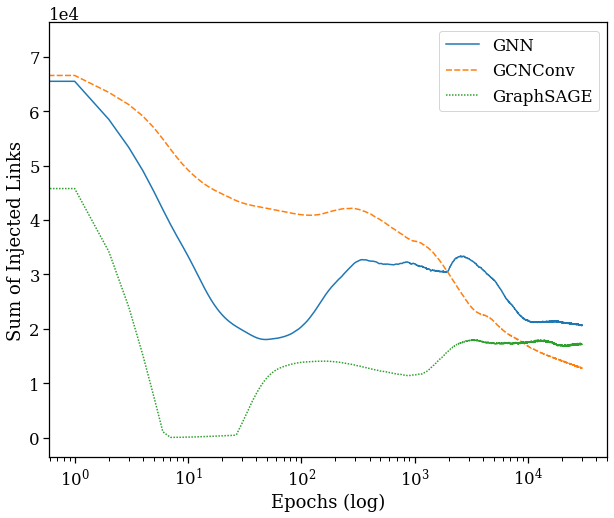

In [13]:
# figure aesthetics
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# initialize figures
fig, ax = plt.subplots(figsize=(10, 8))

df = pd.DataFrame({
    'GNN': injection_sum_gnn,
    'GCNConv': injection_sum_gcn,
    'GraphSAGE': injection_sum_sage
})

sns.lineplot(data=df)
plt.xlabel('Epochs (log)')
plt.ylabel('Sum of Injected Links')
plt.ticklabel_format(style='sci', axis='y', scilimits=(1,4))
plt.xscale('log')
plt.savefig('sum_injection_per_epoch.pdf', bbox_inches='tight')
plt.show()

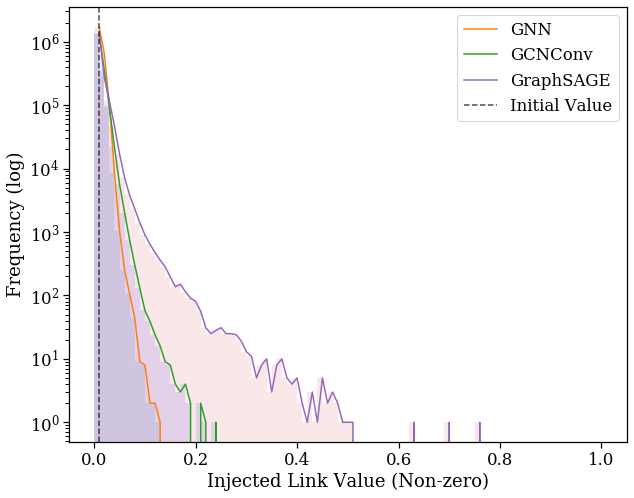

In [10]:
# figure aesthetics
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# initialize figures
fig, ax = plt.subplots(figsize=(10, 8))

# GNN
indexes = injection_final_gnn.nonzero()
values = injection_final_gnn[indexes]
hist, bins = np.histogram(values, bins=100, range=(0, 1))
sns.distplot(
    values, 
    bins=100, 
    kde=False, 
    hist_kws={
        "range": (0, 1), 
        'alpha': 0.1
    }
)
sns.lineplot(x=bins[1:], y=hist, label='GNN')

# GCN
indexes = injection_final_gcn.nonzero()
values = injection_final_gcn[indexes]
hist, bins = np.histogram(values, bins=100, range=(0, 1))
sns.distplot(
    values, bins=100, kde=False, hist_kws={"range": (0, 1), 'alpha': 0.1}, color='blue'
)
sns.lineplot(x=bins[1:], y=hist, label='GCNConv')

# GraphSAGE
indexes = injection_final_sage.nonzero()
values = injection_final_sage[indexes]
hist, bins = np.histogram(values, bins=100, range=(0, 1))
sns.distplot(
    values, bins=100, kde=False, hist_kws={"range": (0, 1), 'alpha': 0.1}
)
sns.lineplot(x=bins[1:], y=hist, label='GraphSAGE')

# draw initial values
plt.axvline(0.01, color='black', alpha=0.7, label='Initial Value', linestyle='dashed')

plt.yscale('log')
plt.xlabel('Injected Link Value (Non-zero)')
plt.ylabel('Frequency (log)')
plt.legend()
plt.savefig('dist_injection_nonzero.pdf', bbox_inches='tight')
plt.show()

In [5]:
zero_frac_gnn = np.sum(injection_final_gnn == 0) / np.size(injection_final_gnn)
zero_frac_gcn = np.sum(injection_final_gcn == 0) / np.size(injection_final_gcn)
zero_frac_sage = np.sum(injection_final_sage == 0) / np.size(injection_final_sage)

zeros_gnn = np.sum(injection_final_gnn == 0)
zeros_gcn = np.sum(injection_final_gcn == 0)
zeros_sage = np.sum(injection_final_sage == 0)

print('Number of Zeros (GNN):', zeros_gnn)
print('Number of Zeros (GCN):', zeros_gcn)
print('Number of Zeros (SAGE):', zeros_sage)

print('Fraction of Zeros (GNN):', zero_frac_gnn)
print('Fraction of Zeros (GCN):', zero_frac_gcn)
print('Fraction of Zeros (SAGE):', zero_frac_sage)

Number of Zeros (GNN): 4868480
Number of Zeros (GCN): 5556872
Number of Zeros (SAGE): 5501260
Fraction of Zeros (GNN): 0.663889913140997
Fraction of Zeros (GCN): 0.7577624370266773
Fraction of Zeros (SAGE): 0.7501789107824293
